## Learning with Massive Data
### Assignment 1 - Parallel graph's triangle counter
#### Giovanni Costa - 880892

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import glob

### Data import

In [2]:
files=glob.glob("results/*.csv")
print(files)

['results/results_static_old.csv', 'results/com-amazon-ungraph.txt_results.csv', 'results/results_dynamic.csv']


In [3]:
df_sparse=pd.read_csv(files[0], header=0)
df_little=pd.read_csv(files[1], header=0)
df_dense=pd.read_csv(files[2], header=0)

In [4]:
df_sparse.head(3)

,filename,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,com-amazon-ungraph.txt,334863,925872,0.000017,1,8.632122,2.228801
1,com-amazon-ungraph.txt,334863,925872,0.000017,2,7.393850,2.730813
2,com-amazon-ungraph.txt,334863,925872,0.000017,3,8.218643,2.372511


In [5]:
df_little.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,334863,925872,0.000017,1,7.328337,1.810618
1,334863,925872,0.000017,2,5.212271,1.388836
2,334863,925872,0.000017,3,5.103772,1.215127


In [6]:
df_dense.head(3)

,filename,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,com-amazon-ungraph.txt,334863,925872,0.000017,1,9.229344,2.490899
1,com-amazon-ungraph.txt,334863,925872,0.000017,2,7.503604,2.181824
2,com-amazon-ungraph.txt,334863,925872,0.000017,3,6.833374,2.369819


### Empirical evaluation

In [7]:
def compute_speedup(df: pd.DataFrame):
    df['total_time']=df['rank_time']+df['triangle_time']
    seq_value=df.query("num_threads==1")['total_time']
    df['tot_speedup']=float(seq_value)/df['total_time']

    seq_value=np.mean(df.query("num_threads==1")['triangle_time'])
    df["tr_speedup"]=float(seq_value)/df['triangle_time']

    seq_value=np.mean(df.query("num_threads==1")['rank_time'])
    df["rank_speedup"]=float(seq_value)/df['rank_time']
    

def plot_alg(df: pd.DataFrame):
    plt.figure(figsize=(4, 3))
    #graph=sns.lineplot(data=tmp_df, x="num_threads", y="speedup", markers=True)
    plt.title('Parallel algorithm performance')
    plt.ylabel('Speedup')
    plt.xlabel('Number of threads')

    max_thread=df["num_threads"].max()
    max_y=max_thread+df["tot_speedup"].max()
    plt.xlim(0, max_thread)
    plt.ylim(0, max_y)

    thread_plot_col=pd.Series([0]+df["num_threads"].tolist())
    tot_speedup_plot_col=thread_plot_col.multiply([0]+df["tot_speedup"].tolist())
    tr_speedup_plot_col=thread_plot_col.multiply([0]+df["tr_speedup"].tolist())
    rank_speedup_plot_col=thread_plot_col.multiply([0]+df["rank_speedup"].tolist())
    plt.xticks(thread_plot_col)
    plt.yticks(thread_plot_col)

    plt.plot(thread_plot_col, thread_plot_col, 'red', label="Linear speedup")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    alpha=0.1,color="red",label="Sublinear zone")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    max_y, alpha=0.1, color="green", label="Superlinear zone")


    plt.plot(thread_plot_col, rank_speedup_plot_col,
                '--',label="RankByDeg speedup")
    plt.plot(thread_plot_col, tr_speedup_plot_col,
                '-o',label="Algorithm speedup")
    plt.plot(thread_plot_col, tot_speedup_plot_col,
                '-x',label="Total speedup")

    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
    plt.show()

#### First dataframe

In [8]:
df_little=df_little.groupby("num_threads").mean().reset_index()
df_little[["num_threads", "rank_time", "triangle_time"]]

,num_threads,rank_time,triangle_time
0,1,8.198230,2.364959
1,2,5.487048,1.775063
2,3,5.548005,1.681973
3,4,6.482946,1.663721
4,5,6.046926,1.696255
5,6,6.429304,1.809723
6,7,6.713398,1.909427
7,8,14.365711,3.756981


In [9]:
compute_speedup(df_little)

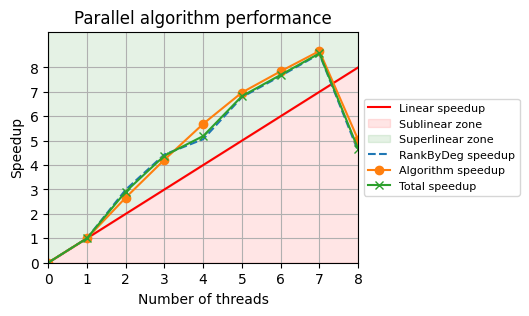

In [10]:
plot_alg(df_little)

In [11]:
print("MAX speedup score:")
print(df_little.drop(columns=['tr_speedup','rank_speedup']).iloc[np.argmax(df_little['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_little.drop(columns=['tr_speedup','rank_speedup']).iloc[np.argmin(df_little['tot_speedup'])], '\n')

MAX speedup score:
num_threads           3.000000
n_nodes          334863.000000
n_edges          925872.000000
density               0.000017
rank_time             5.548005
triangle_time         1.681973
total_time            7.229979
tot_speedup           1.461026
Name: 2, dtype: float64 

MIN speedup score:
num_threads           8.000000
n_nodes          334863.000000
n_edges          925872.000000
density               0.000017
rank_time            14.365711
triangle_time         3.756981
total_time           18.122692
tot_speedup           0.582871
Name: 7, dtype: float64 

